In [52]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Admin\Downloads\scores_data.csv")
df.head()

Batch  User_ID     Score   
0  AI_ELITE_7  uid_149       6 / 7
1  AI_ELITE_7  uid_148       6 / 7
2  AI_ELITE_7  uid_147       7 / 7
3  AI_ELITE_7  uid_146       7 / 7
4  AI_ELITE_7  uid_145       4 / 7

In [53]:
df.shape

(149, 3)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Batch        149 non-null    object
 1   User_ID      149 non-null    object
 2      Score     149 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [55]:
df.isnull().sum()

Batch          0
User_ID        0
   Score       0
dtype: int64

In [56]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print(list(df.columns))

['batch', 'user_id', 'score']


In [57]:
df['score'].dtype

dtype('O')

In [58]:
df['score'] = df['score'].apply(lambda x: eval(x) * 100)

In [59]:
print(df['score'].head())
print(df['score'].dtype) 

0     85.714286
1     85.714286
2    100.000000
3    100.000000
4     57.142857
Name: score, dtype: float64
float64


In [60]:
batch_stats = df.groupby("batch")["score"].agg(
    ["count", "mean", "median", "std", "min", "max"]
).reset_index()

print(batch_stats)

        batch  count       mean     median        std        min    max
0  AI_ELITE_4     48  54.166667  57.142857  20.619652   0.000000  100.0
1  AI_ELITE_6     48  60.416667  57.142857  23.434869   0.000000  100.0
2  AI_ELITE_7     53  72.237197  71.428571  20.666883  28.571429  100.0


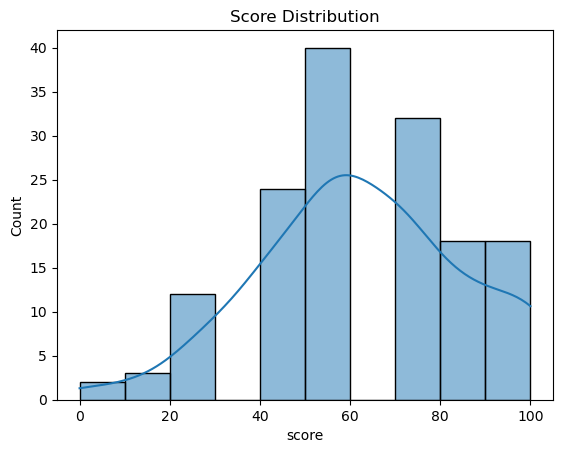

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['score'], bins=10, kde=True)
plt.title("Score Distribution")
plt.show()

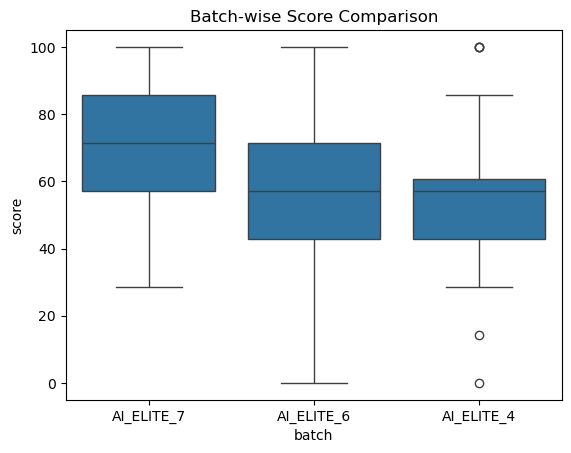

In [11]:
sns.boxplot(x='batch', y='score', data=df)
plt.title("Batch-wise Score Comparison")
plt.show()

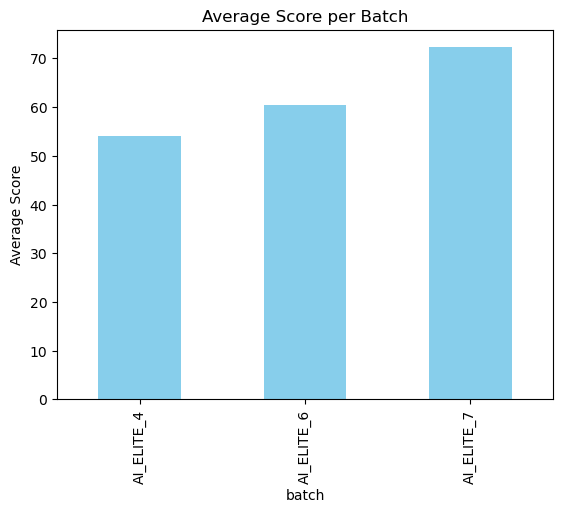

In [12]:
df.groupby('batch')['score'].mean().plot(kind='bar', color='skyblue')
plt.title("Average Score per Batch")
plt.ylabel("Average Score")
plt.show()

In [19]:
top_students = df[df['score'] > 90]
low_students = df[df['score'] < 40]

In [20]:
def performance(score):
    if score >= 90:
        return "Excellent"
    elif score >= 75:
        return "Good"
    elif score >= 50:
        return "Average"
    else:
        return "Needs Improvement"

df['Performance'] = df['score'].apply(performance)

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['performance_label'] = le.fit_transform(df['Performance'])

In [34]:
X = df.drop(columns=['score', 'Performance', 'performance_label', 'user_id'])

In [41]:
print(list(df.columns))

['user_id', 'score', 'Performance', 'performance_label', 'batch_1', 'batch_2']


In [42]:
if 'batch' in df.columns:
    df = pd.get_dummies(df, columns=['batch'], drop_first=True)

In [44]:
X = df.drop(columns=['score', 'Performance', 'performance_label', 'user_id'])
y = df['performance_label']

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.57      1.00      0.72        17
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         4

    accuracy                           0.57        30
   macro avg       0.14      0.25      0.18        30
weighted avg       0.32      0.57      0.41        30


Confusion Matrix:
 [[17  0  0  0]
 [ 3  0  0  0]
 [ 6  0  0  0]
 [ 4  0  0  0]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


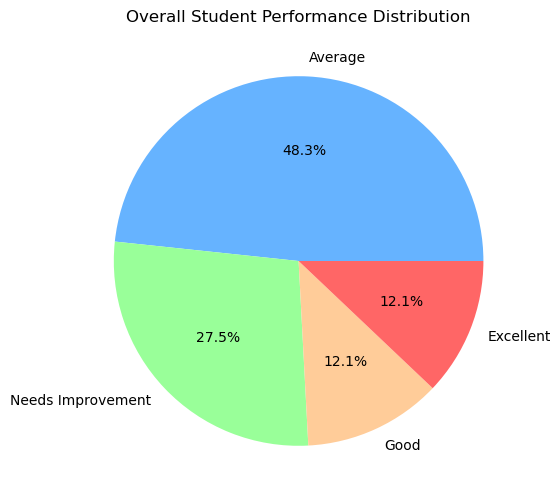

In [47]:
performance_counts = df['Performance'].value_counts()

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(performance_counts, labels=performance_counts.index,
        autopct='%1.1f%%', colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])
plt.title("Overall Student Performance Distribution")
plt.show()